<a href="https://colab.research.google.com/github/adityachoudharyclg/pytorchBasics/blob/master/Linear_regression_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import pandas as pd

Training Data

In [0]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [64]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [65]:
# weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.3986,  0.9069, -1.3115],
        [-1.7581,  0.9774, -1.8318]], requires_grad=True)
tensor([-0.4294, -2.4450], requires_grad=True)


In [0]:
def model(x):
    return x @ w.t() + b

In [67]:
preds=model(inputs)
print(preds)

tensor([[ 106.0342, -144.0684],
        [ 122.7122, -193.6567],
        [ 166.7040, -130.6725],
        [ 132.6955, -207.5209],
        [  91.3304, -158.1496]], grad_fn=<AddBackward0>)


In [0]:
def mse(t1, t2):
    diff = t1 - t2
    # print(diff.numel(),diff.shape[0])
    return torch.sum(diff * diff) / diff.numel()

In [69]:
loss=mse(targets,preds)
print(loss)

tensor(35768.2070, grad_fn=<DivBackward0>)


In [0]:
loss.backward()

In [71]:
print(w)
print(w.grad)

tensor([[ 1.3986,  0.9069, -1.3115],
        [-1.7581,  0.9774, -1.8318]], requires_grad=True)
tensor([[  4416.8589,   3410.9854,   2173.3489],
        [-21888.9434, -22545.0488, -14360.7441]])


In [72]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [0]:
learning_rate=0.0000001
mse_errors=[]
for i in range(10000):
  preds=model(inputs)
  loss=mse(preds,targets)
  mse_errors.append(loss)
  loss.backward()
  # print(i,w,w.grad)
  with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

In [0]:
import matplotlib.pyplot as plt

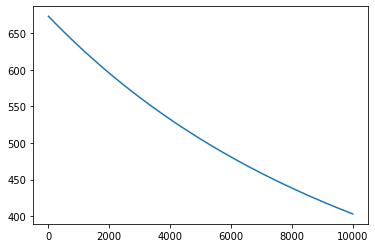

In [81]:
plt.plot(mse_errors)

In [82]:
mse_errors[-1]

tensor(402.9413, grad_fn=<DivBackward0>)

In [83]:
preds

tensor([[ 61.8531,  69.1619],
        [ 72.1467,  86.4409],
        [134.0358, 167.1567],
        [ 47.4195,  31.3507],
        [ 68.9629,  97.2110]], grad_fn=<AddBackward0>)

In [84]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

Linear regression using pytorch built-ins

In [0]:
import torch.nn as nn

In [0]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [0]:
from torch.utils.data import TensorDataset

In [88]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [0]:
from torch.utils.data import DataLoader

In [0]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [92]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.]])
tensor([[ 22.,  37.],
        [ 56.,  70.],
        [ 22.,  37.],
        [ 56.,  70.],
        [119., 133.]])


In [95]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)
print(list(model.parameters()))

Parameter containing:
tensor([[0.2680, 0.3195, 0.0375],
        [0.4561, 0.4340, 0.4344]], requires_grad=True)
Parameter containing:
tensor([ 0.0706, -0.0590], requires_grad=True)
[Parameter containing:
tensor([[0.2680, 0.3195, 0.0375],
        [0.4561, 0.4340, 0.4344]], requires_grad=True), Parameter containing:
tensor([ 0.0706, -0.0590], requires_grad=True)]


In [96]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 42.6516,  80.9964],
        [ 54.9718, 107.4434],
        [ 68.3741, 122.9751],
        [ 42.5286,  81.2027],
        [ 51.8579, 103.4865],
        [ 42.6516,  80.9964],
        [ 54.9718, 107.4434],
        [ 68.3741, 122.9751],
        [ 42.5286,  81.2027],
        [ 51.8579, 103.4865],
        [ 42.6516,  80.9964],
        [ 54.9718, 107.4434],
        [ 68.3741, 122.9751],
        [ 42.5286,  81.2027],
        [ 51.8579, 103.4865]], grad_fn=<AddmmBackward>)

In [0]:
# Import nn.functional
import torch.nn.functional as F

In [0]:
# Define loss function
loss_fn = F.mse_loss

In [99]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(891.3049, grad_fn=<MseLossBackward>)


Optimizer

In [0]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [0]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [104]:
fit(100, model, loss_fn, opt,train_dl)

Epoch [10/100], Loss: 341.7442
Epoch [20/100], Loss: 411.4359
Epoch [30/100], Loss: 132.4249
Epoch [40/100], Loss: 238.7217
Epoch [50/100], Loss: 88.3230
Epoch [60/100], Loss: 92.0219
Epoch [70/100], Loss: 49.8596
Epoch [80/100], Loss: 57.3815
Epoch [90/100], Loss: 36.6776
Epoch [100/100], Loss: 16.2654


In [105]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.5783,  71.5951],
        [ 80.2320,  99.0654],
        [121.1178, 134.7951],
        [ 28.7709,  44.0996],
        [ 93.9961, 112.1811],
        [ 58.5783,  71.5951],
        [ 80.2320,  99.0654],
        [121.1178, 134.7951],
        [ 28.7709,  44.0996],
        [ 93.9961, 112.1811],
        [ 58.5783,  71.5951],
        [ 80.2320,  99.0654],
        [121.1178, 134.7951],
        [ 28.7709,  44.0996],
        [ 93.9961, 112.1811]], grad_fn=<AddmmBackward>)

In [106]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])